In [1]:
!pip install -q yfinance

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN','TSLA','NVDA']

# Set up End and Start times for data grab

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN , TSLA, NVDA]
company_name = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON', 'TESLA','NVIDIA']

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
# df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

In [4]:
df.sort_values(by = 'Date',ascending=False)

,Open,High,Low,Close,Adj_Close,Volume,company_name
Date,,,,,,,
2024-03-28,900.000000,913.000000,891.929993,903.559998,903.559998,43449800,NVIDIA
2024-03-28,180.169998,181.699997,179.259995,180.380005,180.380005,38027400,AMAZON
2024-03-28,171.750000,172.229996,170.509995,171.479996,171.479996,65623100,APPLE
2024-03-28,152.000000,152.669998,151.330002,152.259995,152.259995,21100600,GOOGLE
2024-03-28,420.959991,421.869995,419.119995,420.720001,420.720001,21861700,MICROSOFT
...,...,...,...,...,...,...,...
2023-03-29,268.250000,270.779999,265.970001,269.839996,269.753479,39369400,NVIDIA
2023-03-29,193.130005,195.289993,189.440002,193.880005,193.880005,123660000,TESLA
2023-03-29,278.959991,281.140015,278.410004,280.510010,278.226532,25087000,MICROSOFT


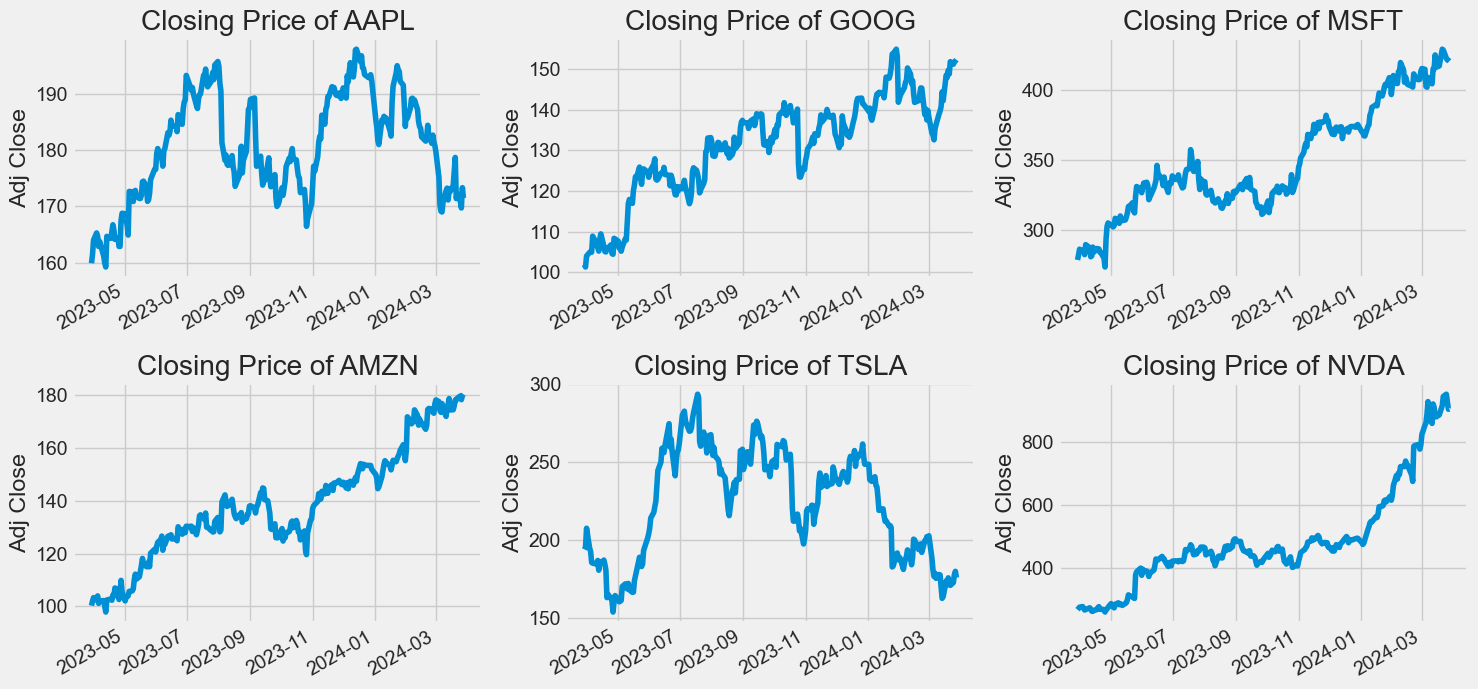

In [5]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 3, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

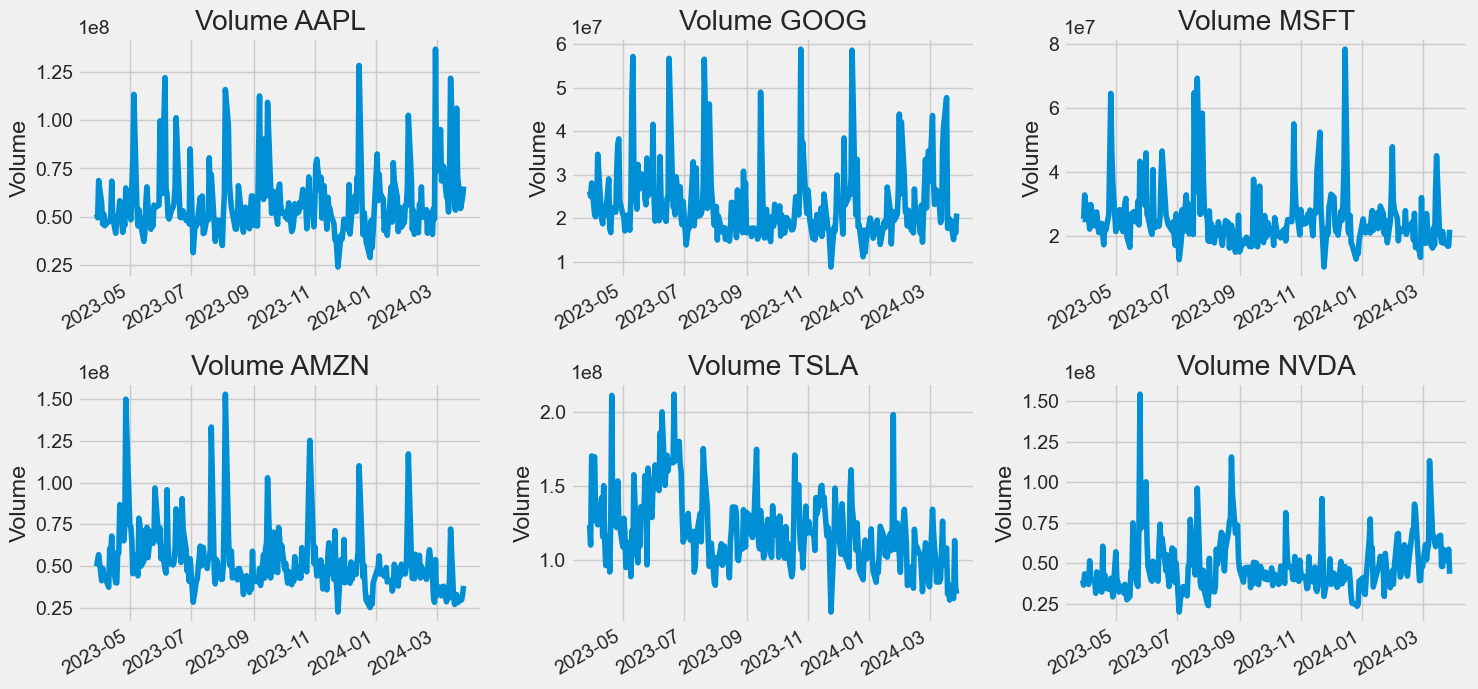

In [6]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 3, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Volume {tech_list[i - 1]}")
    
plt.tight_layout()

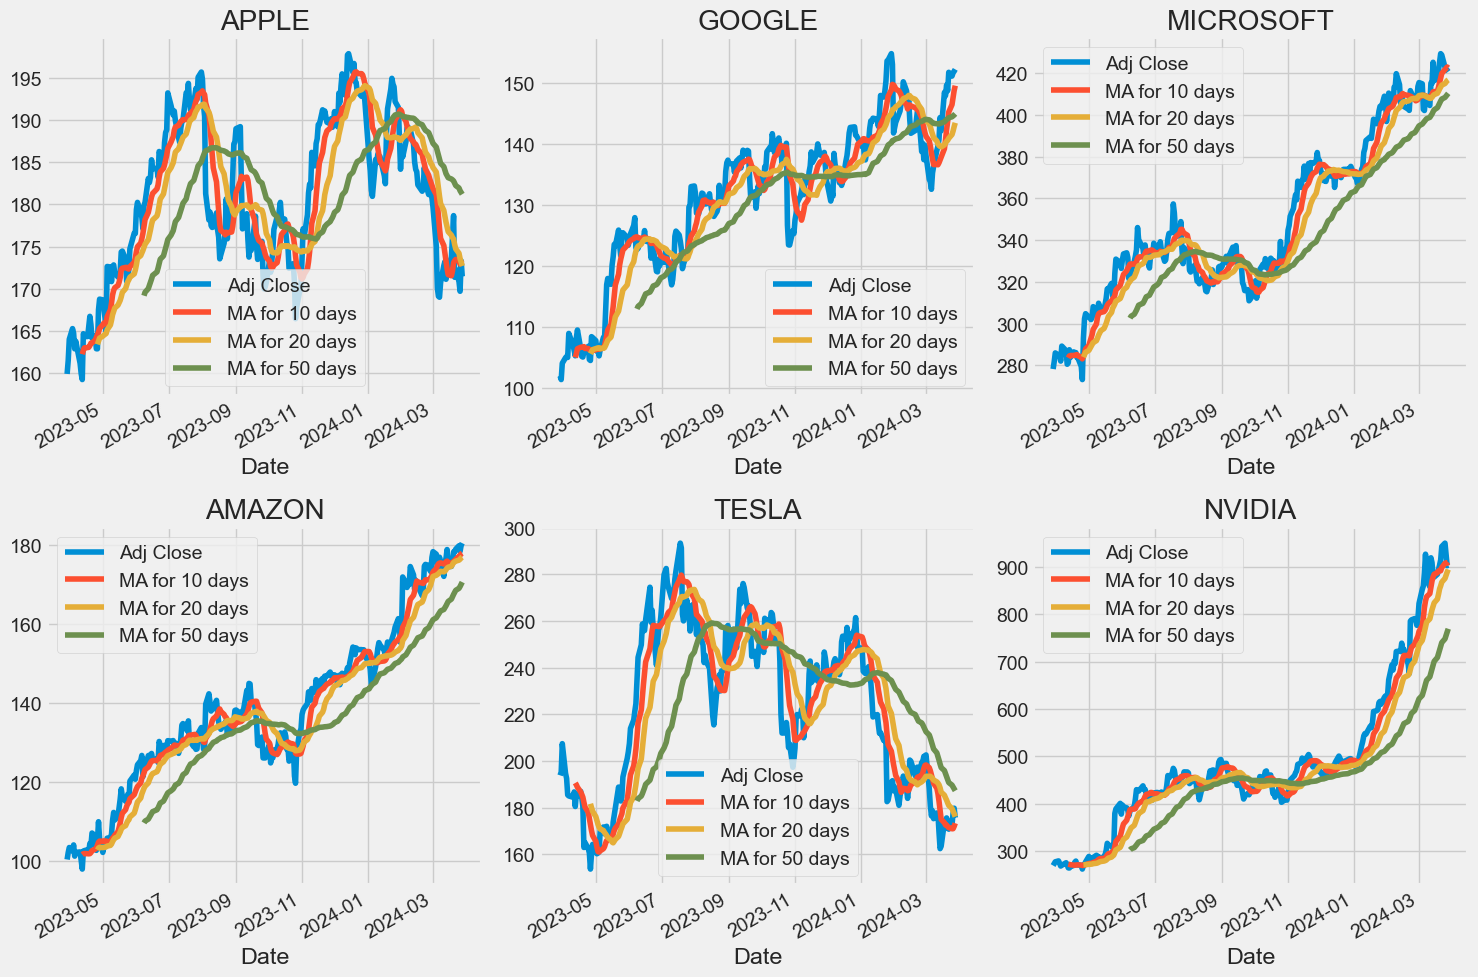

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,2])
axes[0,2].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('AMAZON')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('TESLA')

NVDA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,2])
axes[1,2].set_title('NVIDIA')

fig.tight_layout()

In [8]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  6 of 6 completed


Ticker,AAPL,AMZN,GOOG,MSFT,NVDA,TSLA
Date,,,,,,
2023-03-29,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-30,0.009890,0.017456,-0.005692,0.012620,0.014786,0.007221
2023-03-31,0.015644,0.012647,0.026451,0.014962,0.014388,0.062372
2023-04-03,0.007702,-0.008520,0.008750,-0.003711,0.006768,-0.061168
2023-04-04,-0.003250,0.015038,0.002002,-0.000174,-0.018309,-0.011244


Text(0.5, 1.0, 'Correlation of stock closing price')

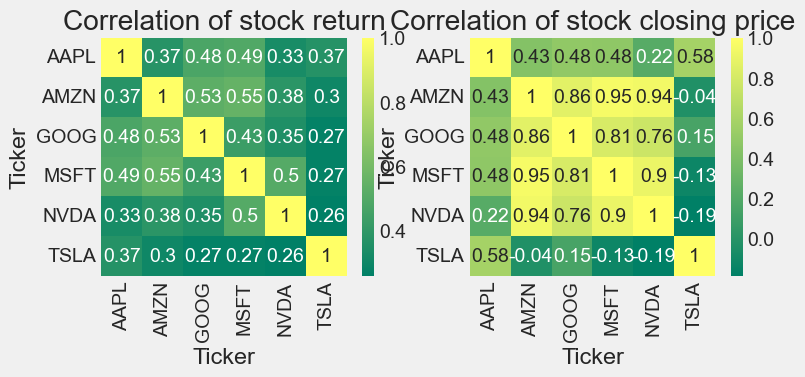

In [9]:
plt.figure(figsize=(12, 10))

plt.subplot(3, 3, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(3, 3, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

In [10]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1437

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.07385677],
       [0.07572255],
       [0.0787031 ],
       ...,
       [0.97135611],
       [0.94423777],
       [0.94548162]])

In [12]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.07385677, 0.07572255, 0.0787031 , 0.08019338, 0.07955972,
       0.07736537, 0.07842148, 0.07533531, 0.07389197, 0.07307056,
       0.07947757, 0.07906688, 0.07909033, 0.08054542, 0.08190662,
       0.08075663, 0.07884392, 0.07920769, 0.07737711, 0.07736537,
       0.08282191, 0.08431217, 0.08420657, 0.08297444, 0.08169539,
       0.07974746, 0.0888769 , 0.08879475, 0.08676469, 0.08886515,
       0.08908811, 0.08770345, 0.08711673, 0.08711673, 0.08784426,
       0.0906136 , 0.09074268, 0.08961616, 0.08651826, 0.08684682,
       0.0881963 , 0.09105949, 0.09325385, 0.09319518, 0.09652776,
       0.09753693, 0.09592931, 0.09549514, 0.09386405, 0.09709103,
       0.09754867, 0.10086951, 0.10030626, 0.10105727, 0.10347457,
       0.10219551, 0.10230112, 0.10106901, 0.10463629, 0.10426077])]
[0.10260622704473885]

[array([0.07385677, 0.07572255, 0.0787031 , 0.08019338, 0.07955972,
       0.07736537, 0.07842148, 0.07533531, 0.07389197, 0.07307056,
       0.07947757, 0.07906688, 0.07

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

d:\Anaconda\Anaconda\envs\lstm\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1377/1377 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 0.0015


In [16]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


66.2872854875302

C:\Users\PC\AppData\Local\Temp\ipykernel_16864\3344400724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


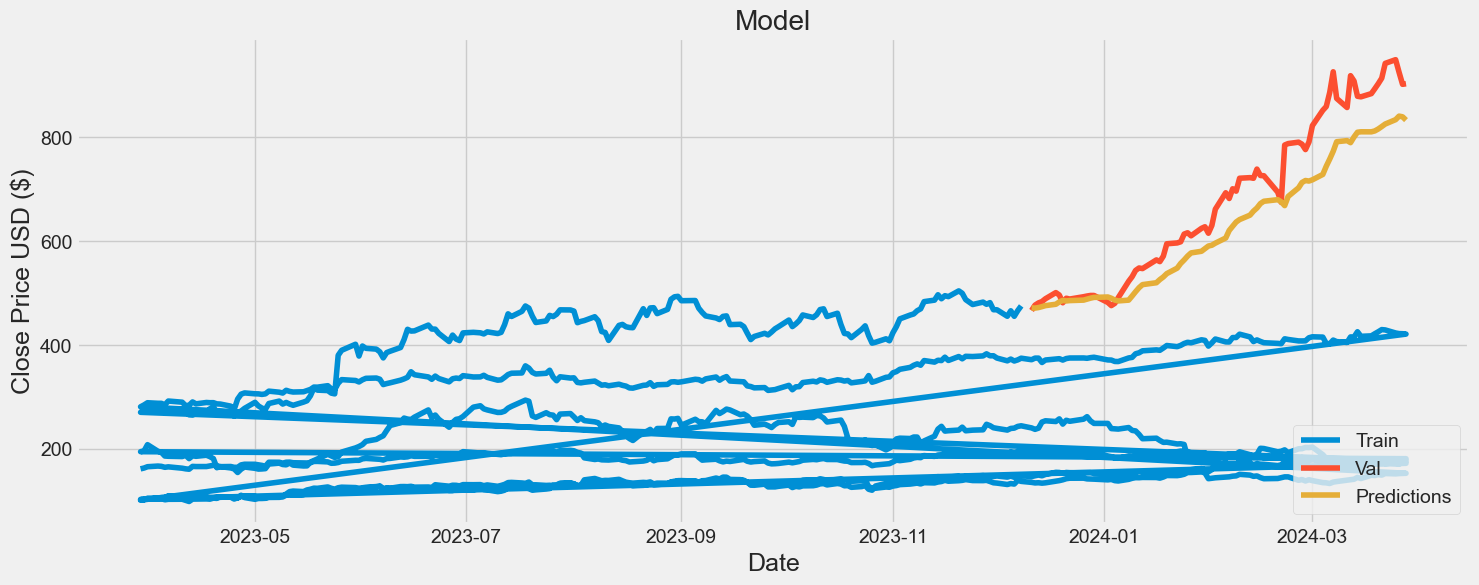

In [19]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [18]:
valid

,Close,Predictions
Date,,
2023-12-11,466.269989,471.311432
2023-12-12,476.570007,470.871979
2023-12-13,480.880005,471.902649
2023-12-14,483.500000,473.679169
2023-12-15,488.899994,475.633606
...,...,...
2024-03-22,942.890015,825.875305
2024-03-25,950.020020,834.329651
2024-03-26,925.609985,841.139343
